## Watson Speech To Text Analysis


### What you'll learn in this notebook
Watson Speech to Text offers so-called parameters for various Speech To text recoganization, audio pre-processing, noise removal, How many speakers are in convertion etc. This Notebook Shows :

## Table of Contents


1.  [Before you start](#beforeYouStart)
1.	[Data Loading](#loadData)
1.  [Speech To Text Recognition](#STT)
1.  [Summary](#summary)

<a id="beforeYouStart"></a>
### 1. Before you start

<span style="color:blueviolet">Begin by importing and initializing some helper libs that are used throughout the notebook.</span>

In [1]:
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline
import soundfile as sf

In [17]:
def print_plot_play(fileName, text=''):
    x, Fs = librosa.load(fileName, sr=None)
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(10, 5))
    plt.plot(x, color='blue')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

<a id="loadData"></a>
## 2. Data Loading (Voice Data)

<div class="alert alert-block alert-info">
<b>Tip:</b> If you want to carry out Topic modeling on any other dataset, you should first upload the dataset into the project and then update the name of the file in the next cell</div>

<span style="color:blueviolet"><strong>Step 2.1</strong> We load the consumer complaints into a DataFrame.</span>

<span style="color:blue">This data set contains 999285 consumer complaints with the date received,product,sub-product, submitted via and company information.</span>

In [18]:
# Load the voice data 
file_name = 'harvard.wav'

WAV file:  Fs = 44100, x.shape = (809508,), x.dtype = float32


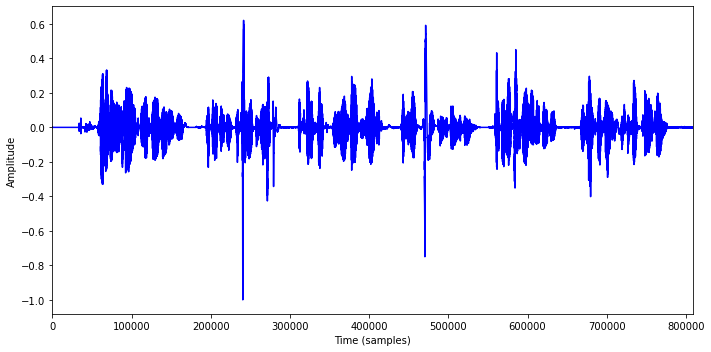

In [19]:
print_plot_play(file_name, text='WAV file: ')

<a id="STT"></a>
## 3. Speech To Text Recognition

<span style="color:blueviolet"> <strong>Step 3.1 <strong>Using Kuberneets Watson Speech To text Service</span>

In [20]:
import requests

In [21]:
# Setting up the headers for post request to service 
# here we can pass any type of media which is belog our audio file like mp3, wav etc . 
#For Example here I am using wav file
headers = {"Content-Type": "audio/wav"}

In [22]:
# setting up the params to send with URL 
# Here we are using model
params ={'model':'en-US_Multimedia'}

In [23]:
speech_to_text_url ='http://localhost:1080/speech-to-text/api/v1/recognize?'

In [24]:
# method to get the values from the speech service 
def getTextFromSpeech(headers,params,file_name):
    r = requests.post(speech_to_text_url,headers=headers,params =params,data=open(file_name, 'rb'))
    return r.text
    

In [25]:
result = getTextFromSpeech(headers,params,file_name)

In [26]:
print(result)

{
   "result_index": 0,
   "results": [
      {
         "final": true,
         "alternatives": [
            {
               "transcript": "the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health insest a salt pickle taste fine with ham tuckles i'll pass door are my favourite assessed full food is the hot cross bun ",
               "confidence": 0.87
            }
         ]
      }
   ]
}


In [27]:
import json
json_result = json.loads(result)
final_result =json_result['results'][0]['alternatives']
print(final_result)

[{'transcript': "the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health insest a salt pickle taste fine with ham tuckles i'll pass door are my favourite assessed full food is the hot cross bun ", 'confidence': 0.87}]


###  Case 1 : background_audio_suppression

WAV file:  Fs = 8000, x.shape = (1104457,), x.dtype = float32


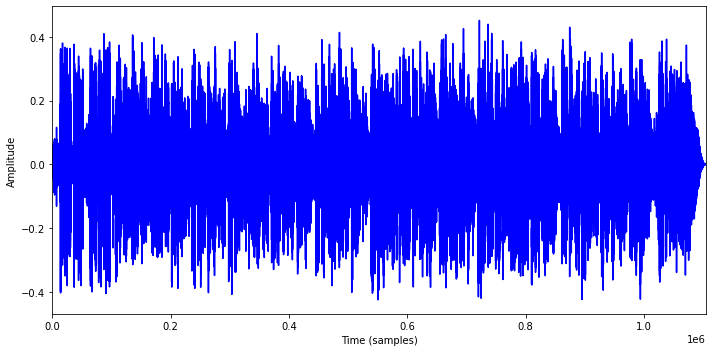

In [28]:
back_audio ='./Sample_dataset/samples_audio-files_11-ibm-culture-2min.wav'
print_plot_play(back_audio, text='WAV file: ')

In [40]:
def show_result(result):
    json_obj = json.loads(result)
    results_data = json_obj['results']
    for result1 in results_data:
        for transcript in result1['alternatives']:
            print("Transcript ---  ", transcript['transcript'])

In [41]:
params ={'model':'en-US_Telephony'}

In [42]:
result_with = getTextFromSpeech(headers,params,back_audio)

In [43]:
show_result(result_with)

Transcript ---   we are standing together shoulder dishours all working for one common door 
Transcript ---   these words from our founder thomas jay watson senior reflect ibm's past and our corporate character today in eighteen ninety nine we hired richard mcgregor and african american sixty five years before the civil right sack of nineteen sixty four in nineteen fourteen we hired our first disabled employee seventy six years before the passage of the americans with disability backed in the nineteen thirties ibm continued its progressive workplace programs and policies with the arrival of professional women and equal pay for equal work and promoted its first female vice president roof leach eminet in nineteen forty three women's careers at ibm have been on the rise ever since 
Transcript ---   in nineteen fifty three thomas jay watson junior established a policy of hiring people without regard to race color or creep making ibm the first us corporation issues such a mandate in the yea

<span style="color:purple">To remove Background noise form data we can use background_audio_suppression parameter with url</span>

In [32]:
params ={'model':'en-US_Telephony',"background_audio_suppression":"0.5"}

In [33]:
result = getTextFromSpeech(headers,params,back_audio)

In [39]:
show_result(result)

Transcript ---   we are standing together shoulder dishours all working for one common door 
Transcript ---   and the go the leach of us as individuals affect the greater good of the company 
Transcript ---   these words from our founder thomas jay watson senior reflect ibm's past and our corporate character today 
Transcript ---   in eighteen ninety nine we hired richard mcgregor and african american sixty five years before the civil right sack of nineteen sixty four in nineteen fourteen we hired our first disabled employee seventy six years before the passage of the americans with disabilities back 
Transcript ---   in the nineteen thirties ibm continued its progressive workplace programs and policies with the arrival of professional women and equal pay for equal work 
Transcript ---   and promoted its first female vice president roof leach eminet in nineteen forty three women's careers at ibm have been on the rise ever since 
Transcript ---   in nineteen fifty three thomas jay watso

### Speech audio parsing
1. End of phrase silence time

In [51]:
params ={'model':'en-US_Multimedia',"end_of_phrase_silence_time":"0.2"}

In [52]:
result = getTextFromSpeech(headers,params,file_name)

In [53]:
show_result(result)

Transcript ---   the stale smell of old beer lingers 
Transcript ---   it takes heat to bring out the odor 
Transcript ---   a cold dip restores health insest 
Transcript ---   a salt pickle taste fine with ham 
Transcript ---   tuckles i'll pastor are my favourite 
Transcript ---   assessed full food is the hot cross bun 


In [57]:
params ={'model':'en-US_Multimedia',"end_of_phrase_silence_time":"0.5"}
result1 = getTextFromSpeech(headers,params,file_name)
show_result(result1)

Transcript ---   the stale smell of old beer lingers 
Transcript ---   it takes heat to bring out the odor 
Transcript ---   a cold dip restores health insest 
Transcript ---   a salt pickle taste fine with ham tuckles i'll passdoor are my favourite 
Transcript ---   assessed full food is the hot cross bun 


In [31]:
# Here output will contain the 
#"end_of_utterance": "full_stop", and output shows into the sentences .


#### Speaker labels 
After set Speaker lables true we are able to see how many people are there 
speaker_labels=true

In [63]:
params ={'model':'en-US_Telephony',"speaker_labels":"true"}
speaker_audio = './Sample_dataset/samples_audio-files_07-ibm-earnings-2min.wav'
result_speaker = getTextFromSpeech(headers,params,speaker_audio)

In [65]:
json_obj = json.loads(result_speaker)
results_data = json_obj['results']
for result1 in results_data:
    print(result1['alternatives'][0]['timestamps'])
speaker_data =json_obj['speaker_labels']
for speaker in speaker_data:
    print(speaker)

[['also', 0.02, 0.18], ['includes', 0.24, 0.6], ['certain', 0.68, 0.86], ['non', 0.92, 1.12], ['gap', 1.14, 1.3], ['financial', 1.34, 1.7], ['measures', 1.76, 2.12], ['in', 2.5, 2.58], ['an', 2.62, 2.66], ['effort', 2.72, 2.94], ['to', 2.98, 3.04], ['provide', 3.08, 3.44], ['additional', 3.46, 3.8], ['information', 3.86, 4.4], ['to', 4.5, 4.56], ['investors', 4.62, 5.14]]
[['all', 5.74, 5.92], ['non', 5.96, 6.18], ['gap', 6.22, 6.4], ['measures', 6.46, 6.84], ['have', 6.9, 7.08], ['been', 7.12, 7.18], ['reconciled', 7.24, 7.84], ['to', 7.92, 7.98], ['the', 8.02, 8.08], ['related', 8.12, 8.4], ['gap', 8.46, 8.66], ['measures', 8.7, 9.1], ['in', 9.22, 9.3], ['accordance', 9.32, 9.84], ['with', 9.9, 10.02], ['s', 10.06, 10.12], ['e', 10.2, 10.26], ['c', 10.3, 10.4], ['wolves', 10.5, 10.84], ['you', 11.46, 11.52], ['will', 11.56, 11.64], ['find', 11.68, 11.86], ['reconciliation', 11.9, 12.64], ['charts', 12.68, 12.92], ['at', 12.94, 13.0], ['the', 13.06, 13.1], ['end', 13.14, 13.24], ['of'

In [125]:
params ={'model':'en-US_Telephony',"speaker_labels":"true"}

In [126]:
result_speaker = getTextFromSpeech(headers,params,'./Sample_dataset/samples_audio-files_07-ibm-earnings-2min.wav')

In [127]:
print(result_speaker)

   {
   "result_index": 0,
   "results": [
      {
         "final": true,
         "alternatives": [
            {
               "transcript": "also includes certain non gap financial measures in an effort to provide additional information to investors ",
               "confidence": 0.91,
               "timestamps": [
                  [
                     "also",
                     0.02,
                     0.18
                  ],
                  [
                     "includes",
                     0.24,
                     0.6
                  ],
                  [
                     "certain",
                     0.68,
                     0.86
                  ],
                  [
                     "non",
                     0.92,
                     1.12
                  ],
                  [
                     "gap",
                     1.14,
                     1.3
                  ],
                  [
                     "financial",
    

In [ ]:
for result1 in results_data:
    data =result1['alternatives']
    for time in data:
        print(time['timestamps'])

In [85]:
json_obj = json.loads(result_speaker)
results_data = json_obj['results']
speaker_data =json_obj['speaker_labels']
for result1 in results_data:
    data =result1['alternatives']
    for time in data:
        #print(time['transcript'])
        i =0
        for t in time['timestamps']:
            if i==0:
                start_time = t[1]
            elif i == len(time['timestamps'])-1:
                end_time = t[2]
            i=i+1   
        #print(start_time)
        #print(end_time)
# Detect how many speaker in chat            
for speaker in speaker_data:
    print("Speaker",speaker['speaker'],speaker['from'])

Speaker 0 0.02
Speaker 0 0.24
Speaker 0 0.68
Speaker 0 0.92
Speaker 0 1.14
Speaker 0 1.34
Speaker 0 1.76
Speaker 0 2.5
Speaker 0 2.62
Speaker 0 2.72
Speaker 0 2.98
Speaker 0 3.08
Speaker 0 3.46
Speaker 0 3.86
Speaker 0 4.5
Speaker 0 4.62
Speaker 0 5.74
Speaker 0 5.96
Speaker 0 6.22
Speaker 0 6.46
Speaker 0 6.9
Speaker 0 7.12
Speaker 0 7.24
Speaker 0 7.92
Speaker 0 8.02
Speaker 0 8.12
Speaker 0 8.46
Speaker 0 8.7
Speaker 0 9.22
Speaker 0 9.32
Speaker 0 9.9
Speaker 0 10.06
Speaker 0 10.2
Speaker 0 10.3
Speaker 0 10.5
Speaker 0 11.46
Speaker 0 11.56
Speaker 0 11.68
Speaker 0 11.9
Speaker 0 12.68
Speaker 0 12.94
Speaker 0 13.06
Speaker 0 13.14
Speaker 0 13.24
Speaker 0 13.32
Speaker 0 13.4
Speaker 0 14.48
Speaker 0 14.8
Speaker 0 14.88
Speaker 0 14.98
Speaker 0 15.42
Speaker 0 15.96
Speaker 0 16.38
Speaker 0 16.48
Speaker 0 16.6
Speaker 0 16.76
Speaker 0 16.9
Speaker 0 18.14
Speaker 0 18.38
Speaker 0 18.5
Speaker 0 18.68
Speaker 0 18.76
Speaker 0 18.98
Speaker 0 19.14
Speaker 0 19.22
Speak

####  Smart Formatting
1. smart_formatting=True 

In [90]:
params ={'model':'en-US_Telephony',"smart_formatting":"true","background_audio_suppression":"0.5"}
result = getTextFromSpeech(headers,params,back_audio)

In [91]:
show_result(result)

Transcript ---   we are standing together shoulder dishours all working for one common door 
Transcript ---   and the go the leach of us as individuals affect the greater good of the company 
Transcript ---   these words from our founder thomas jay watson senior reflect ibm's past and our corporate character today 
Transcript ---   in 1899 we hired richard mcgregor and african american 65 years before the civil right sack of 1964 in 1914 we hired our first disabled employee 76 years before the passage of the americans with disabilities back 
Transcript ---   in the 19 thirties ibm continued its progressive workplace programs and policies with the arrival of professional women and equal pay for equal work 
Transcript ---   and promoted its first female vice president roof leach eminet in 1943 women's careers at ibm have been on the rise ever since 
Transcript ---   in 1953 thomas jay watson junior established a policy of hiring people without regard to race color or creed making ibm the

   {
   "result_index": 0,
   "results": [
      {
         "final": true,
         "alternatives": [
            {
               "transcript": "also includes certain non gap financial measures in an effort to provide additional information to investors ",
               "confidence": 0.91
            }
         ]
      },
      {
         "final": true,
         "alternatives": [
            {
               "transcript": "all non gap measures have been reconciled to the related gap measures in accordance with s e c wolves you will find reconciliation charts at the end of the presentation and in the format k submitted to the s e c ",
               "confidence": 0.87
            }
         ]
      },
      {
         "final": true,
         "alternatives": [
            {
               "transcript": "now i'll turn the call over to martin shoulder ",
               "confidence": 0.92
            }
         ]
      },
      {
         "final": true,
         "alternatives": [
        

<a id="summary"></a>
## 7. Summary

<span style="color:blue">This notebook shows you how to use the Watson Speech library:
1. Remove Background noise
1. Identify Speaker Labels</span>

Please note that this content is made available by IBM Build Lab to foster Embedded AI technology adoption. The content may include systems & methods pending patent with USPTO and protected under US Patent Laws. For redistribution of this content, IBM will use release process. For any questions please log an issue in the [GitHub](https://github.com/ibm-build-labs/Watson-NLP). 

Developed by IBM Build Lab 

Copyright - 2022 IBM Corporation 